# Constantes

In [1]:
DATASET_PATH = 'dataset'

ARTISTS_PATH = f'{DATASET_PATH}/artists.csv'
POSSIBLE_GENRES_PATH = f'{DATASET_PATH}/possible_genres.txt'
IMAGES_PATH = f'{DATASET_PATH}/images/images'
ARTS_PATH = f'{DATASET_PATH}/arts.csv'

IMAGES_SHAPE = (256, 256, 3)

# Resize de imagem

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

os.environ['KMP_DUPLICATE_LIB_OK']='True'

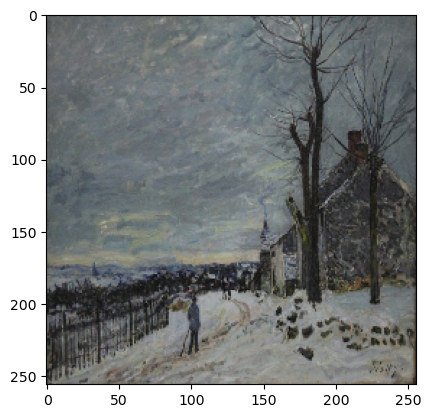

In [3]:
# Load image "dataset\images\images\Alfred_Sisley\Alfred_Sisley_1.jpg"
image = tf.io.read_file("dataset\images\images\Alfred_Sisley\Alfred_Sisley_1.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [256, 256])

# Show image
plt.imshow(image)
plt.show()

In [4]:
def read_and_resize_img(img_path):
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMAGES_SHAPE[0], IMAGES_SHAPE[1]])
    return image

In [5]:
def read_possible_genres():
    possible_genres = open(f'{DATASET_PATH}/possible_genres.txt', 'r').read().split('\n')
    possible_genres.pop()
    return possible_genres

# Analisando e pré-processando base de dados

In [6]:
df_artists = pd.read_csv(ARTISTS_PATH)
df_artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [7]:
# Create a list of all genres
possible_genres = set()

for genres in df_artists['genre']:
    for genre in genres.split(','):
        possible_genres.add(genre)

np.savetxt(POSSIBLE_GENRES_PATH, np.array(list(possible_genres)), fmt='%s')
print(possible_genres)
print(f'São {len(possible_genres)} classes possíveis')

{'Byzantine Art', 'Muralism', 'Surrealism', 'Impressionism', 'Proto Renaissance', 'Baroque', 'Northern Renaissance', 'Suprematism', 'Early Renaissance', 'High Renaissance', 'Art Nouveau', 'Realism', 'Expressionism', 'Romanticism', 'Pop Art', 'Abstractionism', 'Symbolism', 'Cubism', 'Primitivism', 'Neoplasticism', 'Abstract Expressionism', 'Social Realism', 'Post-Impressionism', 'Mannerism'}
São 24 classes possíveis


In [8]:
#Cria o cabeçalho do dataframe
#df_arts = pd.DataFrame(columns=['artist id', 'image path', *possible_genres])
#df_arts.dtypes

In [9]:
#Cria o dataframe com as imagens e as classes
for i, artist in df_artists.iterrows():
    arts_number = artist['paintings']
    current_genres = artist['genre'].split(',')
    artist_name = artist['name'].replace(' ', '_')
    art_artist_dict = {}

    art_artist_dict['artist id'] = np.repeat(artist['id'], arts_number)
    art_artist_dict['image path'] = np.array([f'{IMAGES_PATH}/{artist_name}/{artist_name}_{art_num}.jpg' for art_num in range(1, arts_number + 1)])
    for genre in possible_genres:
        if genre in current_genres:
            art_artist_dict[genre] = np.ones((arts_number), dtype=np.int8)
        else:
            art_artist_dict[genre] = np.zeros((arts_number), dtype=np.int8)
    df_art_artist = pd.DataFrame(art_artist_dict)
    if i == 0:
        df_arts = df_art_artist
    else:
        df_arts = pd.concat([df_arts, df_art_artist], ignore_index=True)
df_arts

,artist id,image path,Byzantine Art,Muralism,Surrealism,Impressionism,Proto Renaissance,Baroque,Northern Renaissance,Suprematism,...,Pop Art,Abstractionism,Symbolism,Cubism,Primitivism,Neoplasticism,Abstract Expressionism,Social Realism,Post-Impressionism,Mannerism
0,0,dataset/images/images/Amedeo_Modigliani/Amedeo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,dataset/images/images/Amedeo_Modigliani/Amedeo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,dataset/images/images/Amedeo_Modigliani/Amedeo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,dataset/images/images/Amedeo_Modigliani/Amedeo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,dataset/images/images/Amedeo_Modigliani/Amedeo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,49,dataset/images/images/Jackson_Pollock/Jackson_...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8442,49,dataset/images/images/Jackson_Pollock/Jackson_...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8443,49,dataset/images/images/Jackson_Pollock/Jackson_...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8444,49,dataset/images/images/Jackson_Pollock/Jackson_...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df_arts.to_csv(f'{DATASET_PATH}/arts.csv', index=False)

In [11]:
def plotar_imgs_artist(df_arts, artist_id):
    artist = df_arts[df_arts['artist id'] == artist_id]
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))

    axs[0, 0].set_title('Primeira imagem')
    axs[0, 0].imshow(read_and_resize_img(artist['image path'].iloc[0]))

    axs[0, 1].set_title('Segunda imagem')
    axs[0, 1].imshow(read_and_resize_img(artist['image path'].iloc[1]))

    axs[1, 0].set_title('Última imagem')
    axs[1, 0].imshow(read_and_resize_img(artist['image path'].iloc[-1]))

    axs[1, 1].set_title('Penúltima imagem')
    axs[1, 1].imshow(read_and_resize_img(artist['image path'].iloc[-2]))

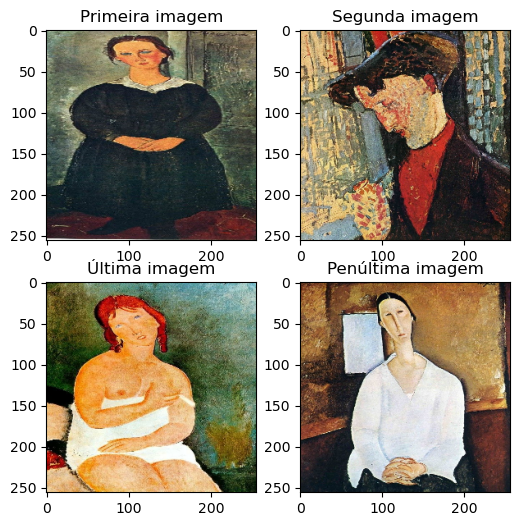

In [12]:
plotar_imgs_artist(df_arts, 0)

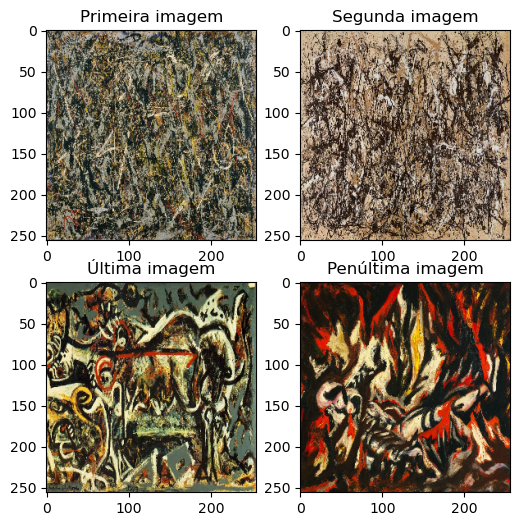

In [13]:
plotar_imgs_artist(df_arts, 49)

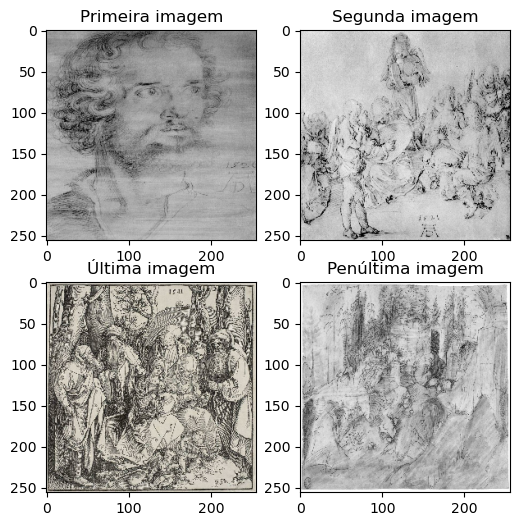

In [14]:
plotar_imgs_artist(df_arts, 19)

In [15]:
# Executar o código a seguir caso tenha ocorrido um problema de enconding ao
# baixar o dataset

import os
import shutil

erro1 = 'Albrecht_DuÔòá├¬rer'
erro2 = 'Albrecht_Du╠êrer'

correto = df_artists.iloc[19]['name'].replace(' ', '_')


if os.path.exists(f'dataset/images/images/{erro1}'):
    shutil.rmtree(f'dataset/images/images/{erro1}')

if os.path.exists(f'dataset/images/images/{erro2}'):
    os.rename(
        f'dataset/images/images/{erro2}', 
        f'dataset/images/images/{correto}'
    )

    for i, file in enumerate(os.listdir(f'dataset/images/images/{correto}')):
        os.rename(
            f'dataset/images/images/{correto}/{file}', 
            f'dataset/images/images/{correto}/{correto}_{i+1}.jpg'
        )

In [16]:
if not os.path.exists('dataset/resized'):
    os.mkdir('dataset/resized')

for i, art in df_arts.iterrows():
    img_path = art['image path']
    img_name = img_path.split('/')[-1]
    artist_name = img_path.split('/')[-2]
    new_img_path = f'{RESIZED_PATH}/{artist_name}/{img_name}'
    df_arts['image path'][i] = new_img_path

    image = read_and_resize_img(img_path)
    if not os.path.exists(f'{RESIZED_PATH}/{artist_name}'):
        os.mkdir(f'{RESIZED_PATH}/{artist_name}')
    tf.keras.utils.save_img(new_img_path, image)

df_arts.to_csv(f'{DATASET_PATH}/arts_resized_paths.csv', index=False)

C:\Users\gregf\AppData\Local\Temp\ipykernel_16392\281779141.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arts['image path'][i] = new_img_path


In [65]:
def load_dataset(arts_paths_dataset='dataset/arts_resized_paths.csv'):
    df_arts_path = pd.read_csv(arts_paths_dataset)
    images = np.zeros((len(df_arts_path), *IMAGES_SHAPE), dtype=np.float16)
    
    for i, art in df_arts_path.iterrows():
        img_path = art['image path']

        image = tf.io.read_file(img_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float16)

        images[i] = image

    return images, df_arts_path

In [66]:
images, df_arts = load_dataset()
df_arts.head()

,artist id,image path,Byzantine Art,Muralism,Surrealism,Impressionism,Proto Renaissance,Baroque,Northern Renaissance,Suprematism,...,Pop Art,Abstractionism,Symbolism,Cubism,Primitivism,Neoplasticism,Abstract Expressionism,Social Realism,Post-Impressionism,Mannerism
0,0,dataset/resized/Amedeo_Modigliani/Amedeo_Modig...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,dataset/resized/Amedeo_Modigliani/Amedeo_Modig...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,dataset/resized/Amedeo_Modigliani/Amedeo_Modig...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,dataset/resized/Amedeo_Modigliani/Amedeo_Modig...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,dataset/resized/Amedeo_Modigliani/Amedeo_Modig...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separando os dados em treino e teste

In [67]:
from sklearn.model_selection import train_test_split

#holdout
X = images
Y = df_arts

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, stratify=Y['artist id'])

Y_train = Y_train.drop(columns=['artist id'])
Y_test = Y_test.drop(columns=['artist id'])


## Treinando primeira rede neural

In [29]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

OUTPUT_SIZE = len(read_possible_genres())


In [21]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGES_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(OUTPUT_SIZE, activation='sigmoid'))

In [68]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

MemoryError: Unable to allocate 5.88 GiB for an array with shape (8023, 256, 256, 3) and data type float32

In [ ]:
venus = read_and_resize_img('dataset/resized/Sandro_Botticelli/Sandro_Botticelli_22.jpg')
venus = venus.numpy()
model.predict(venus.reshape(1, 256, 256, 3))


1/1 [==============================] - 0s 20ms/step


array([[-1.604878  , -0.03024906,  0.08441658, -1.1741471 , -0.21780127,
         0.21134973, -0.83703333, -0.7135512 , -0.68438506, -0.50814694,
        -1.2070924 , -0.5337082 , -0.9095168 , -0.85884666, -0.14797601,
        -0.37167343, -0.11596671, -1.0153407 , -0.48500472, -1.1565417 ,
        -0.0018092 , -1.1841513 , -1.3413106 , -0.40646327]],
      dtype=float32)

In [ ]:
print(possible_genres)

{'Social Realism', 'Romanticism', 'Symbolism', 'Baroque', 'Muralism', 'Post-Impressionism', 'Suprematism', 'Expressionism', 'Northern Renaissance', 'Pop Art', 'Abstract Expressionism', 'Art Nouveau', 'Proto Renaissance', 'Impressionism', 'Byzantine Art', 'Surrealism', 'High Renaissance', 'Neoplasticism', 'Abstractionism', 'Mannerism', 'Primitivism', 'Early Renaissance', 'Cubism', 'Realism'}
